In [1]:
import re
import pandas as pd

# Path to your WhatsApp export file
file_path = "whatsapp_export/WhatsApp Chat with Bitches!!.txt"

# Define a pattern to match WhatsApp messages
pattern = r"(?P<timestamp>\d{1,2}/\d{1,2}/\d{1,2}, \d{1,2}:\d{1,2}) - (?P<sender>[^:]+): (?P<message>.+)"

# Lists to store parsed data
timestamps = []
senders = []
messages = []

with open(file_path, "r", encoding="utf-8") as file:
    current_message = None
    for line in file:
        line = line.strip()
        if match := re.match(pattern, line):
            # Extract groups
            matches_dict = match.groupdict()
            timestamps.append(matches_dict.get('timestamp'))
            senders.append(matches_dict.get('sender'))
            messages.append(matches_dict.get('message'))
            current_message = len(messages) - 1
        elif current_message is not None:
            # Handle multi-line messages
            messages[current_message] += f" {line}"

# Create a DataFrame
df = pd.DataFrame({
    "Timestamp": timestamps,
    "Sender": senders,
    "Message": messages
})

# Convert Timestamp column to datetime
# df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%d/%m/%Y, %H:%M")


In [2]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%y, %H:%M')

In [3]:
df

,Timestamp,Sender,Message
0,2020-03-11 11:10:00,Nathan Woods,They think theres a recession coming so they d...
1,2020-03-11 11:10:00,George Walker,Is this not in response to the largest drop in...
2,2020-03-11 11:10:00,Nathan Woods,Someone is peppering ours i can hear it 🤮
3,2020-03-11 11:10:00,Tom Fain,To be fair the media hype up everything anyway...
4,2020-03-11 11:11:00,Jamie Collinge,The financial crisis was as a result of finaci...
...,...,...,...
99928,2024-11-28 18:35:00,Paul Martin,I feel like his last few have sounded a bit ge...
99929,2024-11-28 18:36:00,Nathan Woods,I expected nig things since the beef!!
99930,2024-11-28 18:38:00,Ben Huchinson,I feel so old I have no idea what you guys are...
99931,2024-11-30 12:06:00,Paul Martin,Happy birthday @447740557623 xx


In [4]:
df[df['Sender'] == 'Mike']

,Timestamp,Sender,Message
105,2020-03-11 20:02:00,Mike,Mental
106,2020-03-11 20:03:00,Mike,Would also be interesting to see if they think...
107,2020-03-11 20:03:00,Mike,I would like to think so but would interesting
112,2020-03-11 20:06:00,Mike,Saw a labour mp gunning down tories but their ...
113,2020-03-11 20:06:00,Mike,Now*
...,...,...,...
99630,2024-10-26 09:12:00,Mike,So good
99752,2024-11-08 13:28:00,Mike,Yea na I think the red cross were handing out ...
99764,2024-11-08 15:16:00,Mike,So Raad is MAGA?
99823,2024-11-15 11:27:00,Mike,Tune


In [5]:
df.groupby('Sender')['Message'].count().sort_values()

Sender
+351 930 642 050         139
Chris Williams           243
+44 7957 134271          698
+351 932 720 693        1102
Skelly                  1214
Tom Fain                1874
+351 926 233 694        2757
Laurens Whittingham     3173
Alex Sloane xxx         4119
Ben Huchinson           4248
Jamie Collinge          5099
George Walker           5909
Jordan Eves             6067
Jl                      7536
Paul Martin             7619
Ollie Sales             7826
Ryan Rees               8976
Raad Alani              9377
Nathan Woods           10121
Mike                   11836
Name: Message, dtype: int64

In [6]:
from textblob import TextBlob

In [7]:
# Define a function to analyze sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # returns a polarity score between -1 and 1

# Apply sentiment analysis to the DataFrame
df['Sentiment'] = df['Message'].apply(get_sentiment)

<Axes: xlabel='Sender'>

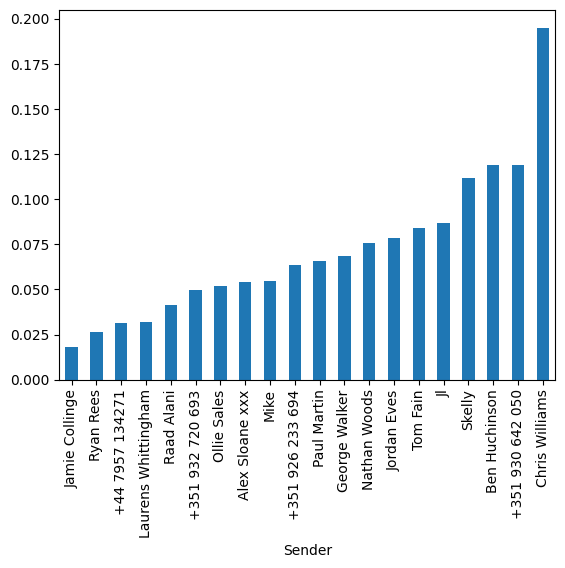

In [18]:
df.groupby('Sender')['Sentiment'].mean().sort_values().plot(kind='bar')

In [24]:
df[df['Sentiment'] == df['Sentiment'].min()]

,Timestamp,Sender,Message,Sentiment,n_fucks,Emoji Count,message_len
976,2020-03-15 14:27:00,Alex Sloane xxx,Looked like the worst skier out of all of us.....,-1.0,0,3,53
1875,2020-03-18 12:10:00,Mike,Their coffee is fucking awful,-1.0,1,0,29
2473,2020-03-19 11:22:00,+44 7957 134271,I’m not saying the world is gonna end but be p...,-1.0,0,1,67
2546,2020-03-19 12:47:00,Nathan Woods,Worst camera positioning everrrr,-1.0,0,0,32
2810,2020-03-20 11:06:00,Ben Huchinson,Looool init worst lip syncing ever 😂😂,-1.0,0,2,37
...,...,...,...,...,...,...,...
97581,2024-05-20 15:45:00,Ryan Rees,"Yeah I read that this morning, bloody dreading...",-1.0,0,1,50
97851,2024-05-30 19:52:00,Paul Martin,Bloody hell you're tanned mate!,-1.0,0,2,31
99036,2024-08-21 19:46:00,Ryan Rees,Insane garage,-1.0,0,0,13
99091,2024-08-26 20:27:00,George Walker,Bloody ell congrats geez !! Xx,-1.0,0,2,31


In [9]:
df['n_fucks'] = df['Message'].str.lower().str.count('fuck')

In [25]:
df['n_gay'] = df['Message'].str.lower().str.count('gay')

In [36]:
df[df['Message'].str.lower().str.contains('gay')].groupby('Sender')['Message'].count()

Sender
+351 926 233 694        1
+351 930 642 050        2
+351 932 720 693        1
+44 7957 134271         1
Alex Sloane xxx         2
Ben Huchinson           2
George Walker           1
Jamie Collinge          2
Jl                      2
Jordan Eves             8
Laurens Whittingham     1
Mike                    6
Nathan Woods            4
Ollie Sales             6
Paul Martin            19
Raad Alani             14
Ryan Rees               9
Skelly                  1
Tom Fain                2
Name: Message, dtype: int64

In [28]:
df.groupby('Sender')['n_gay'].sum().sort_values(ascending=False)
# ((df.groupby('Sender')['n_fucks'].sum() / df.groupby('Sender')['Message'].count()) * 100).sort_values().plot(kind='bar')

Sender
Paul Martin            19
Raad Alani             15
Ryan Rees               9
Jordan Eves             8
Ollie Sales             7
Mike                    6
Nathan Woods            4
Tom Fain                3
Ben Huchinson           2
Jamie Collinge          2
Alex Sloane xxx         2
+351 930 642 050        2
Jl                      2
+44 7957 134271         1
+351 926 233 694        1
+351 932 720 693        1
George Walker           1
Laurens Whittingham     1
Skelly                  1
Chris Williams          0
Name: n_gay, dtype: int64

<Axes: xlabel='Sender'>

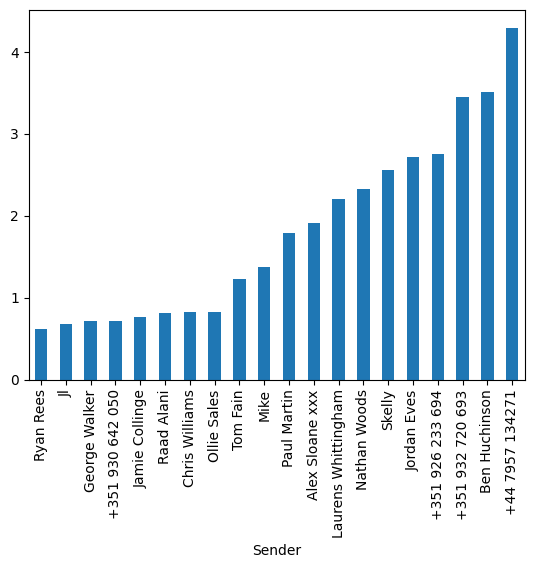

In [17]:
((df.groupby('Sender')['n_fucks'].sum() / df.groupby('Sender')['Message'].count()) * 100).sort_values().plot(kind='bar')

In [11]:
emoji_pattern = r'[^\w\s,]'
df['Emoji Count'] = df['Message'].apply(lambda x: len(re.findall(emoji_pattern, x)))

In [12]:
df['message_len'] = df['Message'].str.len()

<Axes: xlabel='Sender'>

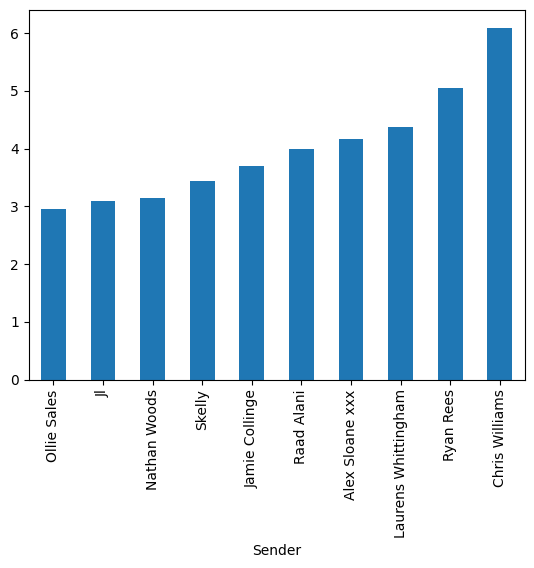

In [16]:
((df.groupby('Sender')['Emoji Count'].sum() / df.groupby('Sender')['message_len'].sum()) * 100).sort_values()[10:].plot(kind='bar')